In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Visualizing the dataset

In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

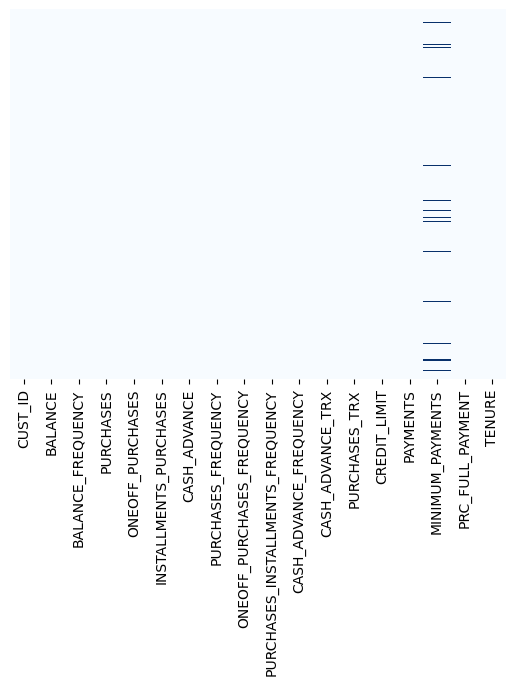

In [8]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

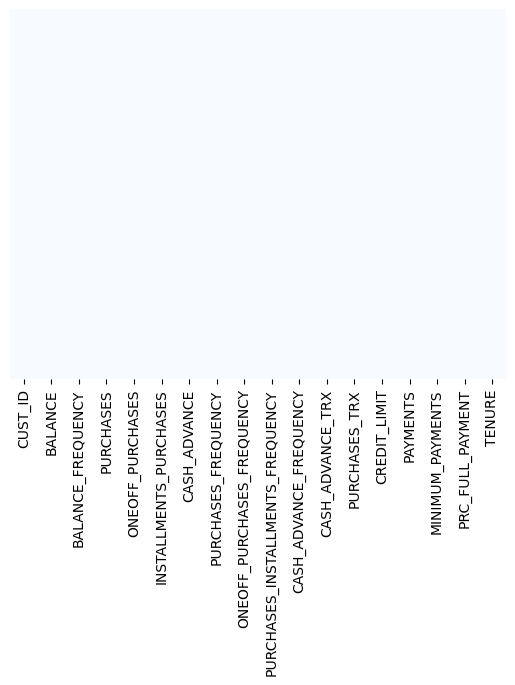

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [14]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

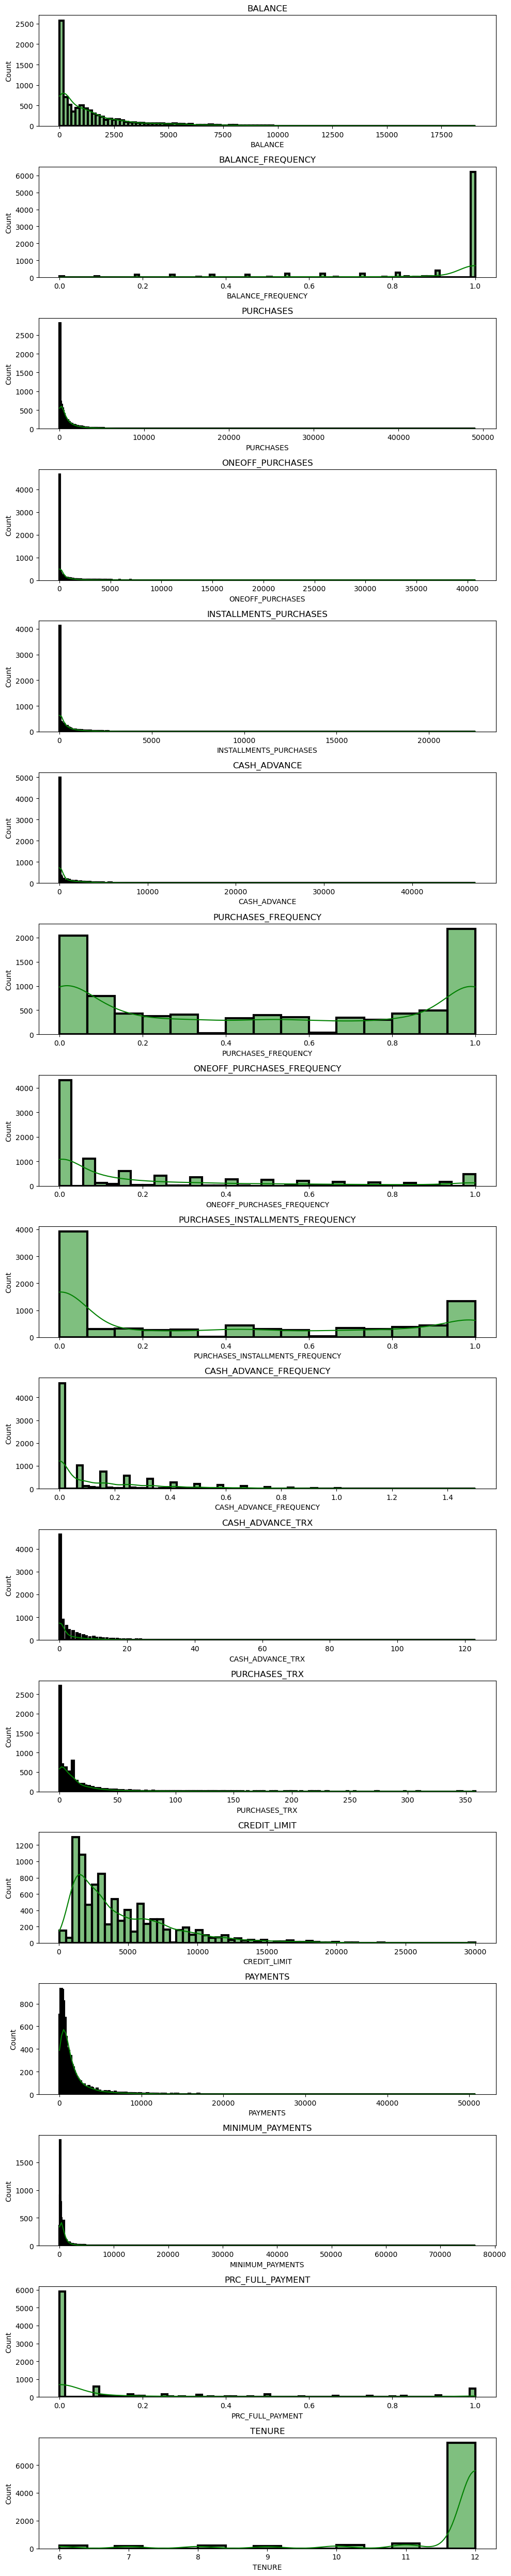

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, color="g", linewidth=3, label="KDE")
    plt.title(creditcard_df.columns[i])
plt.tight_layout()





In [19]:
correlations = creditcard_df.corr()

<Axes: >

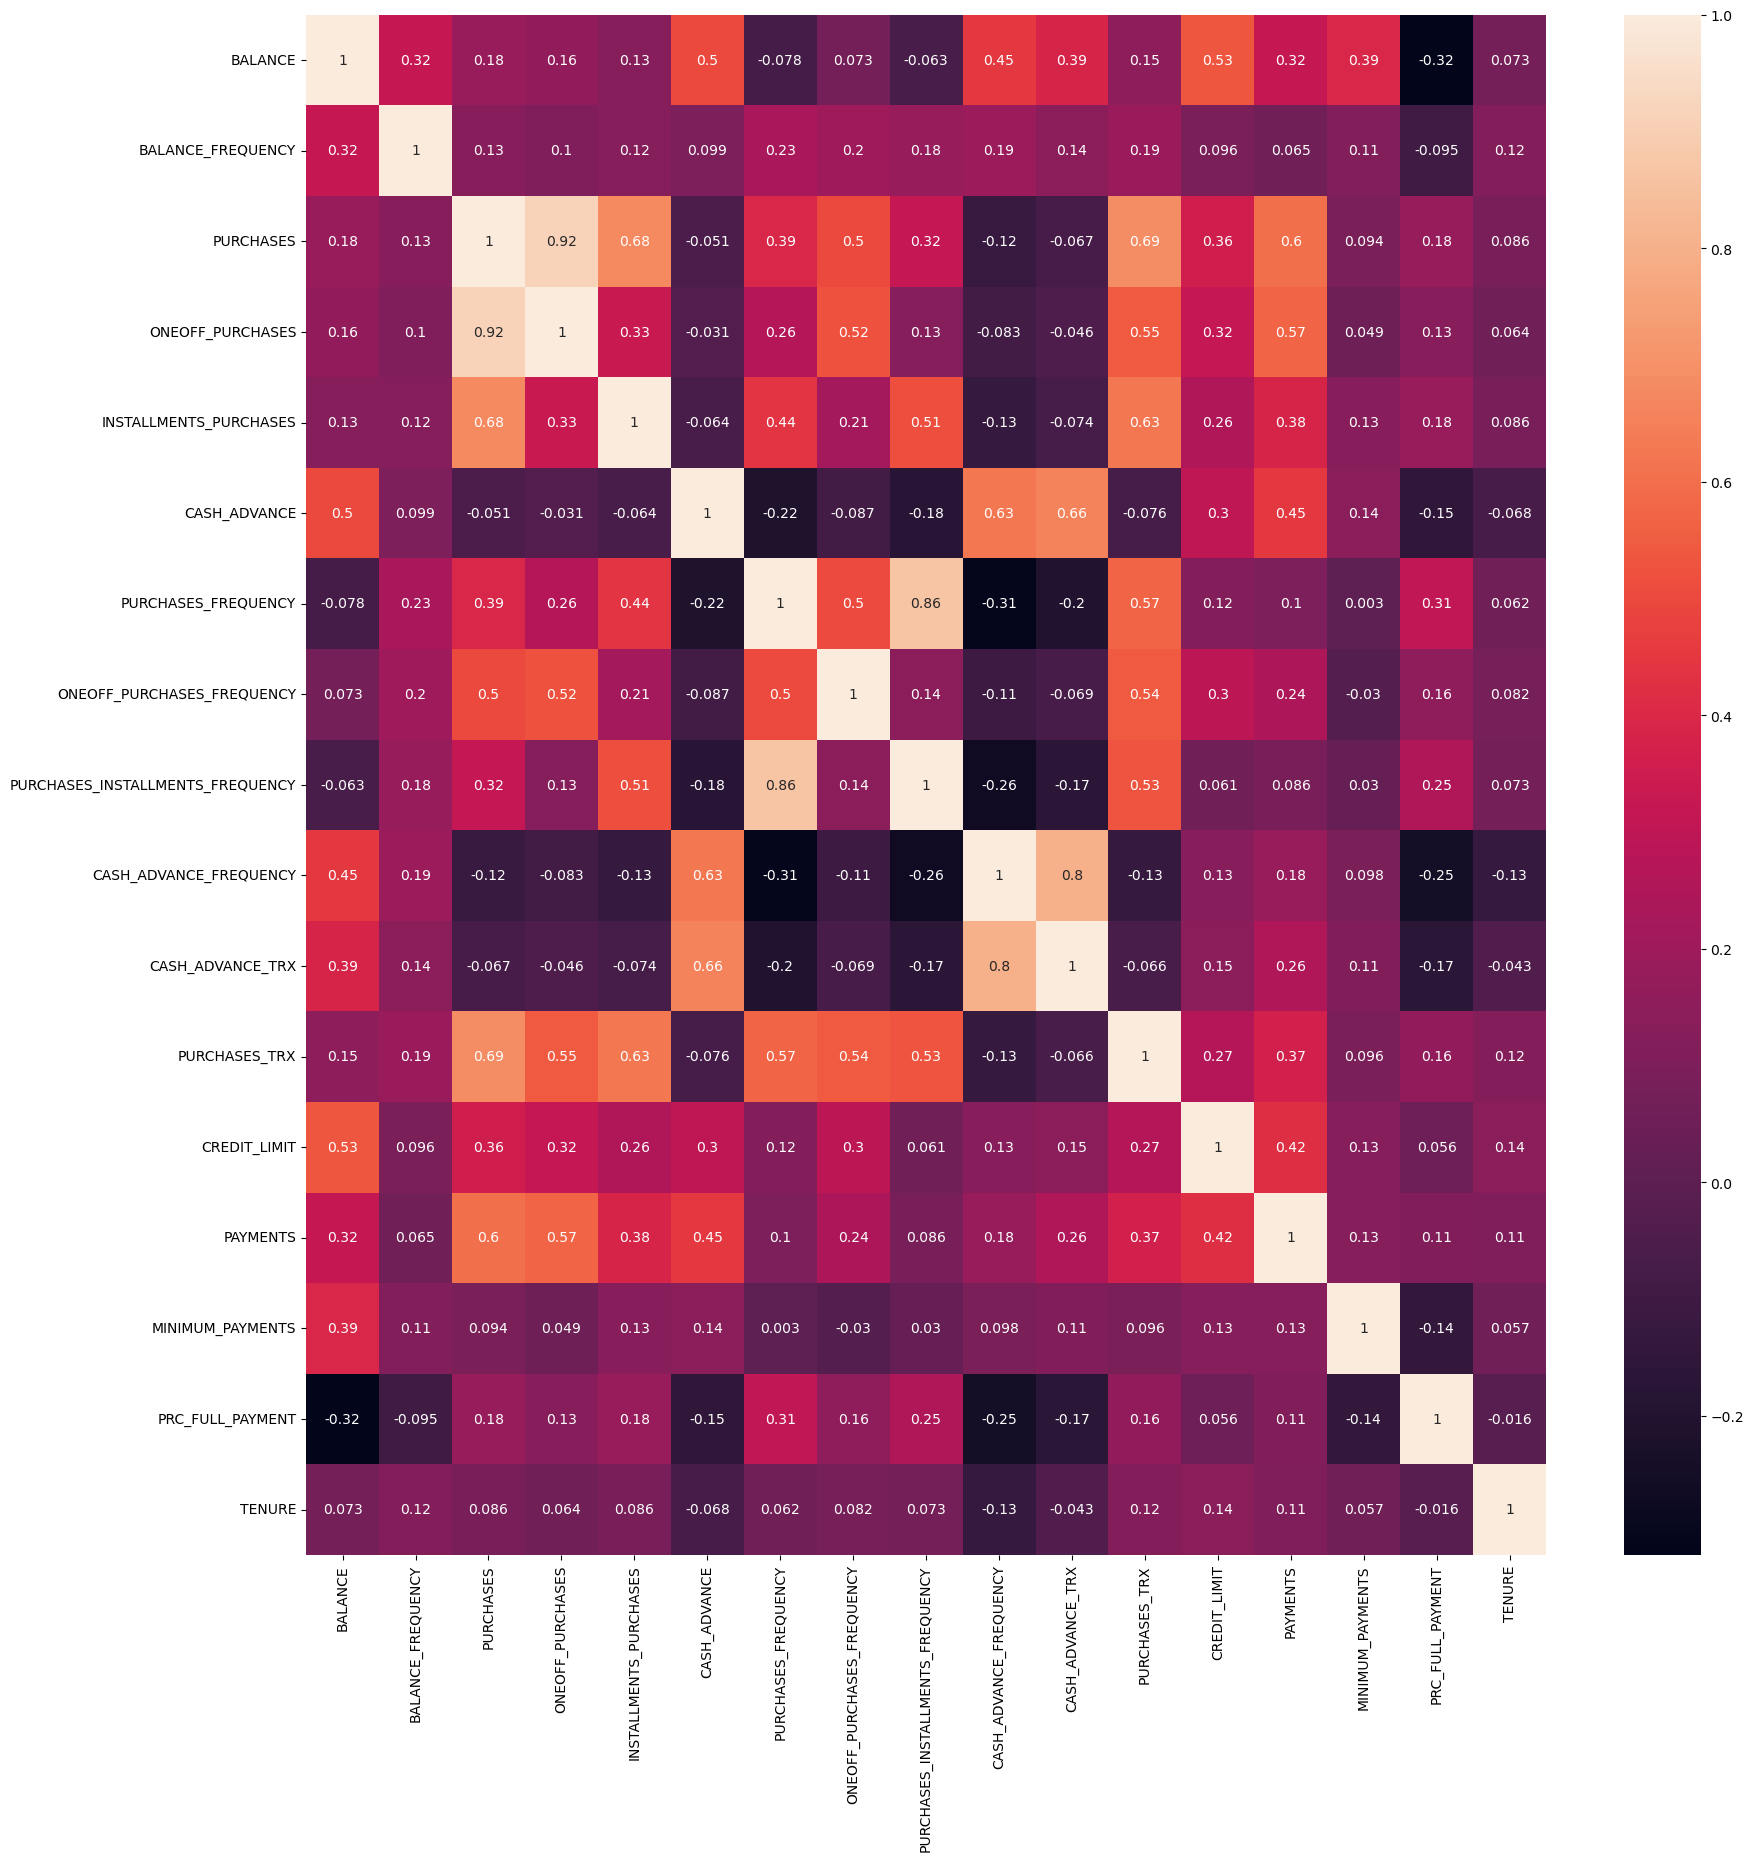

In [20]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [21]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# K means algorithm

In [22]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

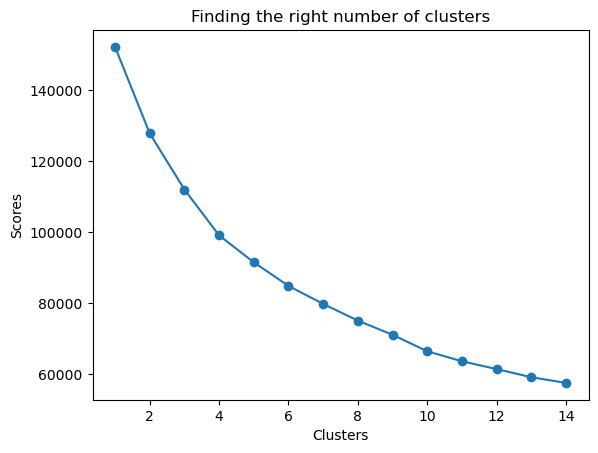

In [25]:
scores_1 = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init=10)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(range(1,15), scores_1, marker = 'o')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

# DBSCAN Algorithm

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Finding the optimal values of min samples and Epsilon

In [27]:


# Define a range of values for epsilon and min_samples
eps_values = np.arange(0.1, 1.0, 0.05)  # Adjust the range of eps values according to your data
min_samples_values = range(2, 11)  # Adjust the range of min_samples values according to your data

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(creditcard_df_scaled)
        silhouette_avg = silhouette_score(creditcard_df_scaled, dbscan.labels_)
        
        # Print silhouette score for each combination of parameters
        print(f"Epsilon: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette_avg}")
        
        # Update best parameters if silhouette score improves
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: Epsilon={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_score}")


Epsilon: 0.1, Min Samples: 2, Silhouette Score: -0.510629746674835
Epsilon: 0.1, Min Samples: 3, Silhouette Score: -0.47603460134320114
Epsilon: 0.1, Min Samples: 4, Silhouette Score: -0.4269385823473039
Epsilon: 0.1, Min Samples: 5, Silhouette Score: -0.3748076349580268
Epsilon: 0.1, Min Samples: 6, Silhouette Score: -0.2555947500796704
Epsilon: 0.1, Min Samples: 7, Silhouette Score: -0.25597461642057595
Epsilon: 0.1, Min Samples: 8, Silhouette Score: -0.25322845911882724
Epsilon: 0.1, Min Samples: 9, Silhouette Score: -0.25356488418531886
Epsilon: 0.1, Min Samples: 10, Silhouette Score: -0.25356488418531886
Epsilon: 0.15000000000000002, Min Samples: 2, Silhouette Score: -0.5156229677540313
Epsilon: 0.15000000000000002, Min Samples: 3, Silhouette Score: -0.4752369709677364
Epsilon: 0.15000000000000002, Min Samples: 4, Silhouette Score: -0.4606281472440559
Epsilon: 0.15000000000000002, Min Samples: 5, Silhouette Score: -0.42742038120057185
Epsilon: 0.15000000000000002, Min Samples: 6, 

Epsilon: 0.6500000000000001, Min Samples: 3, Silhouette Score: -0.5216982589468319
Epsilon: 0.6500000000000001, Min Samples: 4, Silhouette Score: -0.5012434456493063
Epsilon: 0.6500000000000001, Min Samples: 5, Silhouette Score: -0.45871128826096264
Epsilon: 0.6500000000000001, Min Samples: 6, Silhouette Score: -0.4156746106699421
Epsilon: 0.6500000000000001, Min Samples: 7, Silhouette Score: -0.383197559874372
Epsilon: 0.6500000000000001, Min Samples: 8, Silhouette Score: -0.36924926820369913
Epsilon: 0.6500000000000001, Min Samples: 9, Silhouette Score: -0.3205720069317069
Epsilon: 0.6500000000000001, Min Samples: 10, Silhouette Score: -0.32030878865477114
Epsilon: 0.7000000000000002, Min Samples: 2, Silhouette Score: -0.5201299388783004
Epsilon: 0.7000000000000002, Min Samples: 3, Silhouette Score: -0.5144006647901669
Epsilon: 0.7000000000000002, Min Samples: 4, Silhouette Score: -0.4945806362496981
Epsilon: 0.7000000000000002, Min Samples: 5, Silhouette Score: -0.43883698908601104


# finding the optimal number of clusters

In [28]:
from sklearn.cluster import DBSCAN

# Optimal values for eps and min_samples
eps_optimal = 0.9
min_samples_optimal = 8

# Fit DBSCAN with optimal parameters
dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan.fit(creditcard_df_scaled)

# Extract cluster labels
cluster_labels = dbscan.labels_

# Count unique labels (excluding noise points)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

print(f"Number of clusters found by DBSCAN: {num_clusters}")


Number of clusters found by DBSCAN: 6


# Apply K means

In [29]:
kmeans = KMeans(n_clusters = 8, n_init = 10)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [30]:
kmeans.cluster_centers_.shape

(8, 17)

In [31]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
1,-0.128617,0.400131,0.544080,0.672169,0.051391,-0.329506,0.982744,1.901707,0.180367,-0.412975,-0.330968,0.622767,0.441432,0.151635,-0.157619,0.443433,0.268936
2,1.664145,0.395708,-0.222117,-0.158080,-0.234839,1.984909,-0.483456,-0.213163,-0.423283,1.912272,1.910702,-0.271665,1.007912,0.791326,0.542867,-0.395455,0.074055
3,0.006515,0.403431,-0.356035,-0.241074,-0.398834,-0.102472,-0.847471,-0.391986,-0.750977,0.089105,-0.038436,-0.480182,-0.307992,-0.253274,-0.012657,-0.455817,0.274177
4,-0.362038,0.333459,-0.034237,-0.243104,0.365480,-0.362055,0.997643,-0.384789,1.210526,-0.473089,-0.359703,0.191391,-0.261349,-0.215001,-0.029903,0.318431,0.256379
5,-0.334420,-0.345964,-0.287608,-0.213813,-0.286869,0.066735,-0.202187,-0.284499,-0.224350,0.309892,0.001051,-0.386198,-0.564078,-0.392481,-0.209075,0.012516,-3.197384
6,-0.700925,-2.142134,-0.310284,-0.234754,-0.302264,-0.320004,-0.554897,-0.442027,-0.440022,-0.520884,-0.376232,-0.419274,-0.173107,-0.191655,-0.256474,0.286055,0.200241
7,1.043784,0.464554,2.512251,1.813895,2.607769,-0.159469,1.163903,1.562227,1.271093,-0.283885,-0.148862,3.138287,1.303996,1.443156,0.564343,0.258344,0.337328


In [32]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
1,1296.768806,0.972058,2165.640543,1708.100338,457.540205,287.881981,0.884773,0.769774,0.436120,0.052504,0.990214,30.189502,6100.558072,2172.111401,496.882970,0.283411,11.877224
2,5028.251451,0.971010,528.648290,330.056614,198.706040,5141.318609,0.296316,0.138867,0.196214,0.517809,16.287964,7.957255,8161.647408,4023.954829,2129.335342,0.038051,11.616423
3,1578.034761,0.972840,242.530968,192.303790,50.407332,763.983128,0.150219,0.085521,0.065980,0.152975,2.986531,2.774299,3373.850261,999.940021,834.709180,0.020396,11.884237
4,810.924110,0.956264,930.056002,188.934870,741.566436,219.625448,0.890753,0.087668,0.845531,0.040474,0.794118,19.467099,3543.554438,1110.736430,794.518441,0.246850,11.860419
5,868.408201,0.795315,388.726464,237.550976,151.655488,1118.817057,0.409203,0.117586,0.275275,0.197157,3.256000,5.110400,2442.103119,596.951086,376.966567,0.157375,7.238400
6,105.558439,0.369819,340.277591,202.794193,137.734286,307.806878,0.267644,0.070593,0.189562,0.030910,0.681319,4.288250,3864.614915,1178.322375,266.504786,0.237381,11.785292
7,3737.022934,0.987319,6370.667301,3603.131080,2769.240767,644.458203,0.957481,0.668500,0.869602,0.078336,2.232955,92.715909,9238.920455,5910.939989,2179.384932,0.229276,11.968750


In [33]:
labels.shape # Labels associated to each data point

(8950,)

In [34]:
labels.max()

7

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([7, 4, 2, ..., 0, 0, 0], dtype=int32)

In [37]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


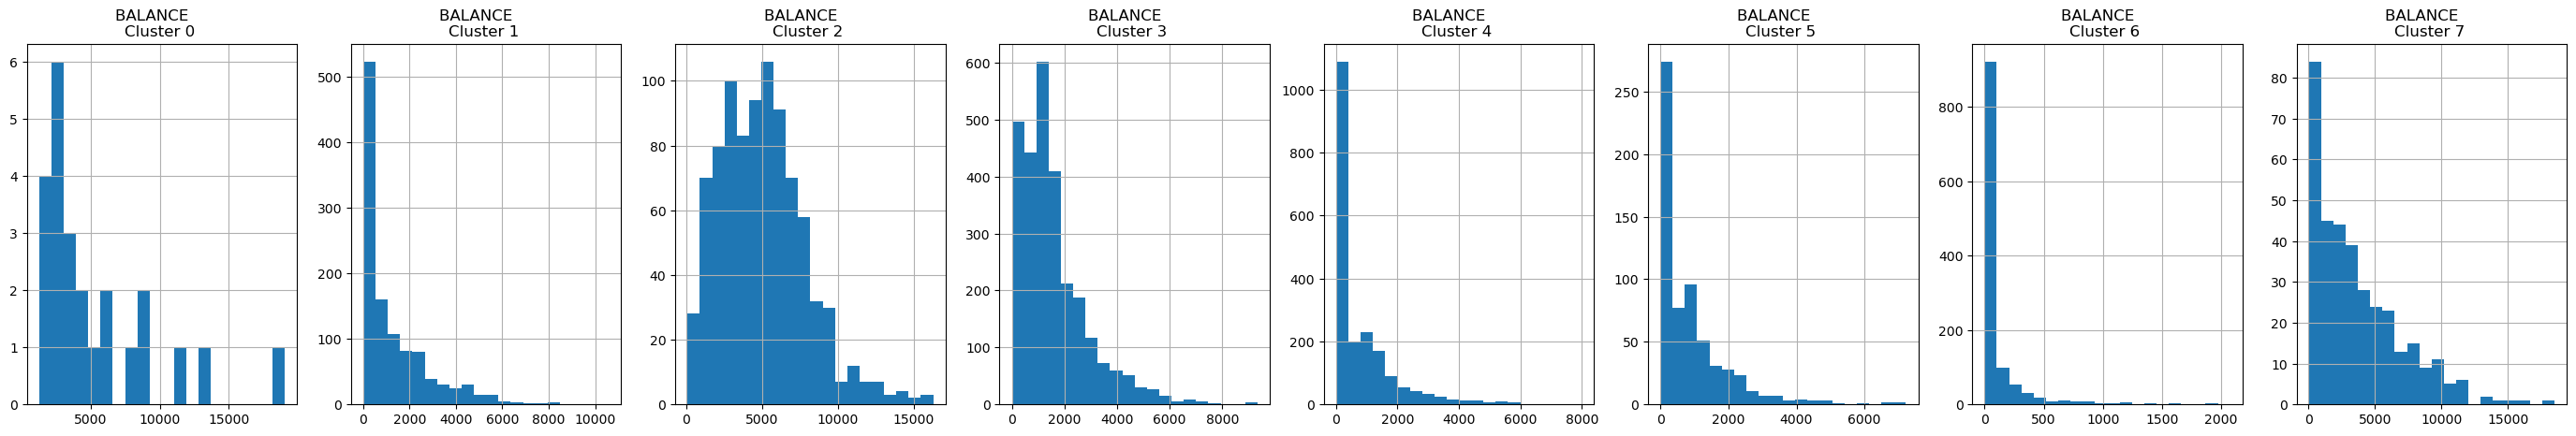

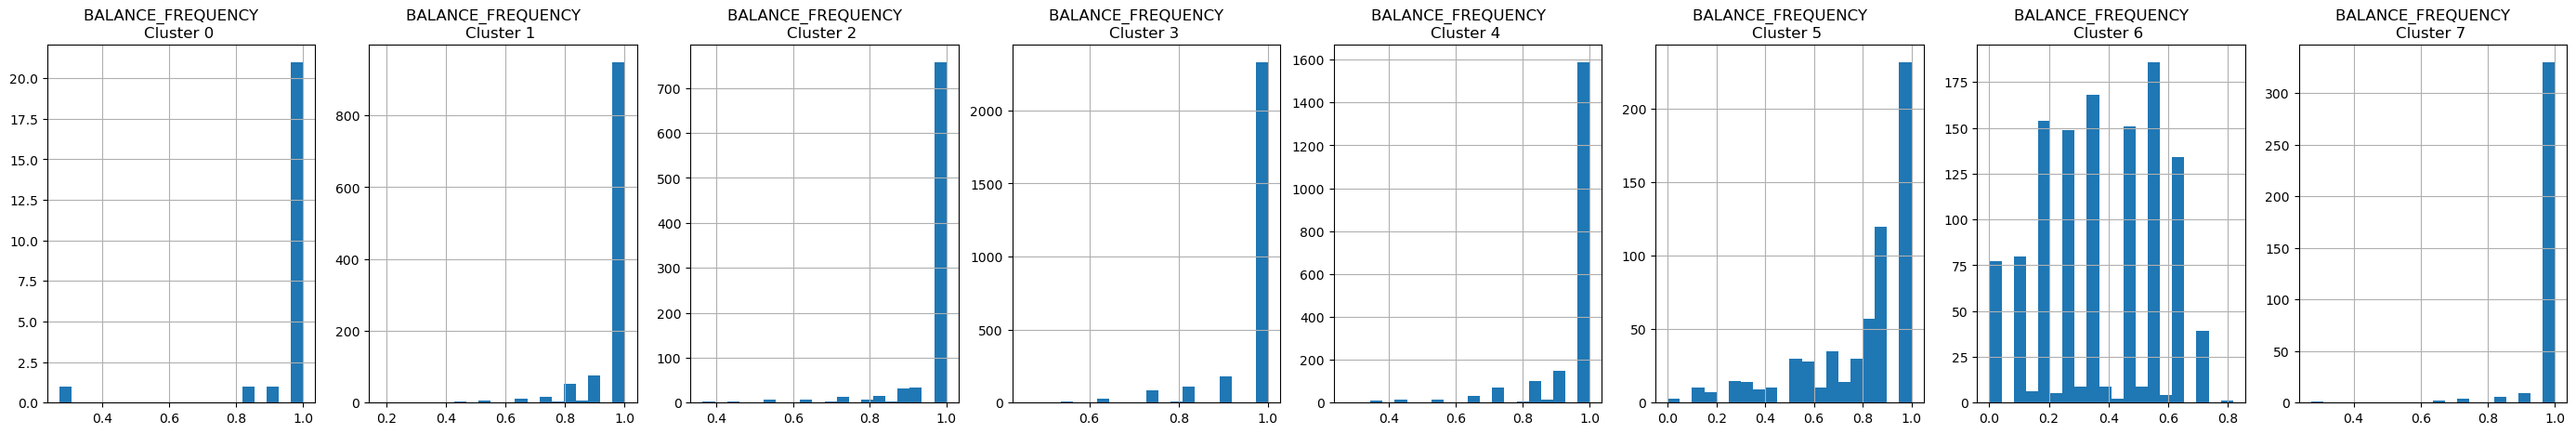

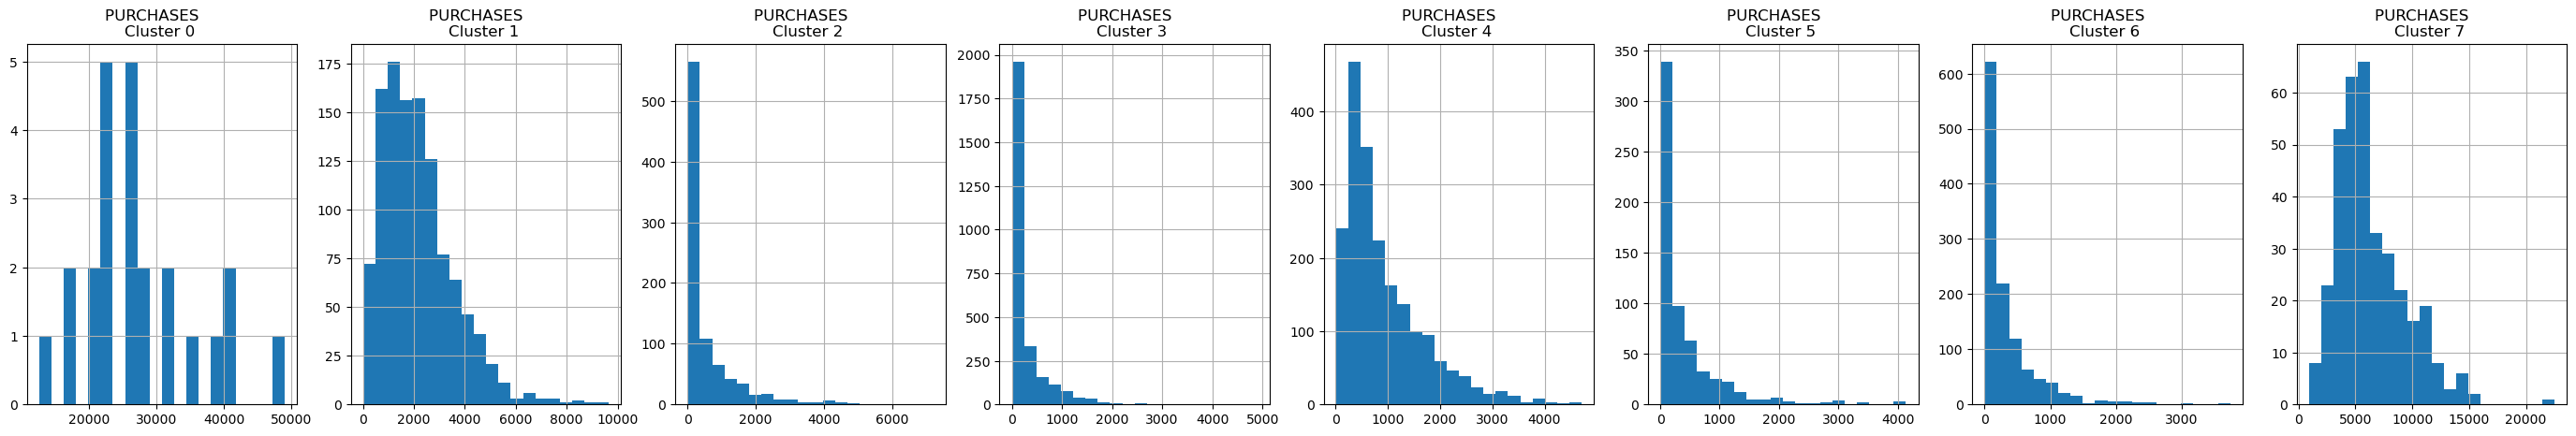

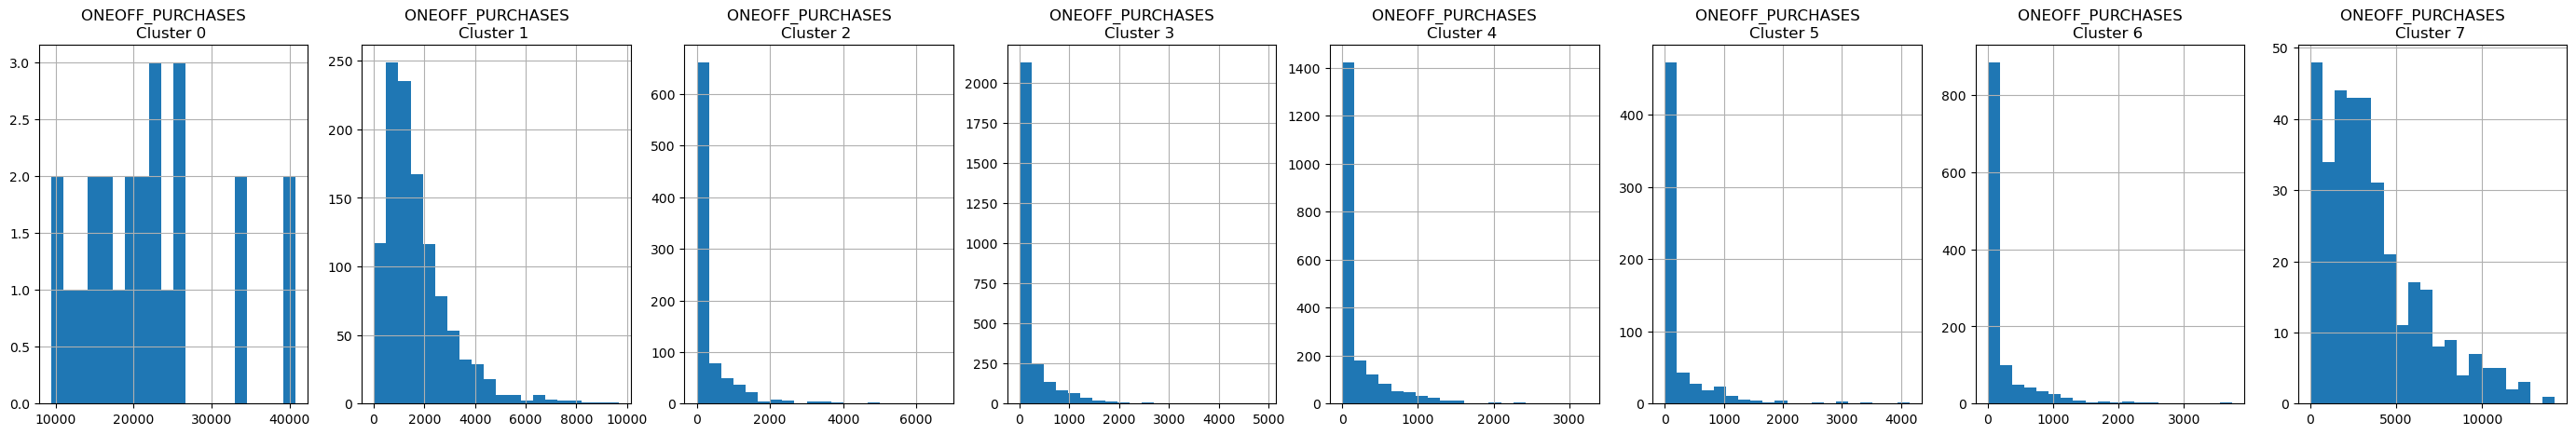

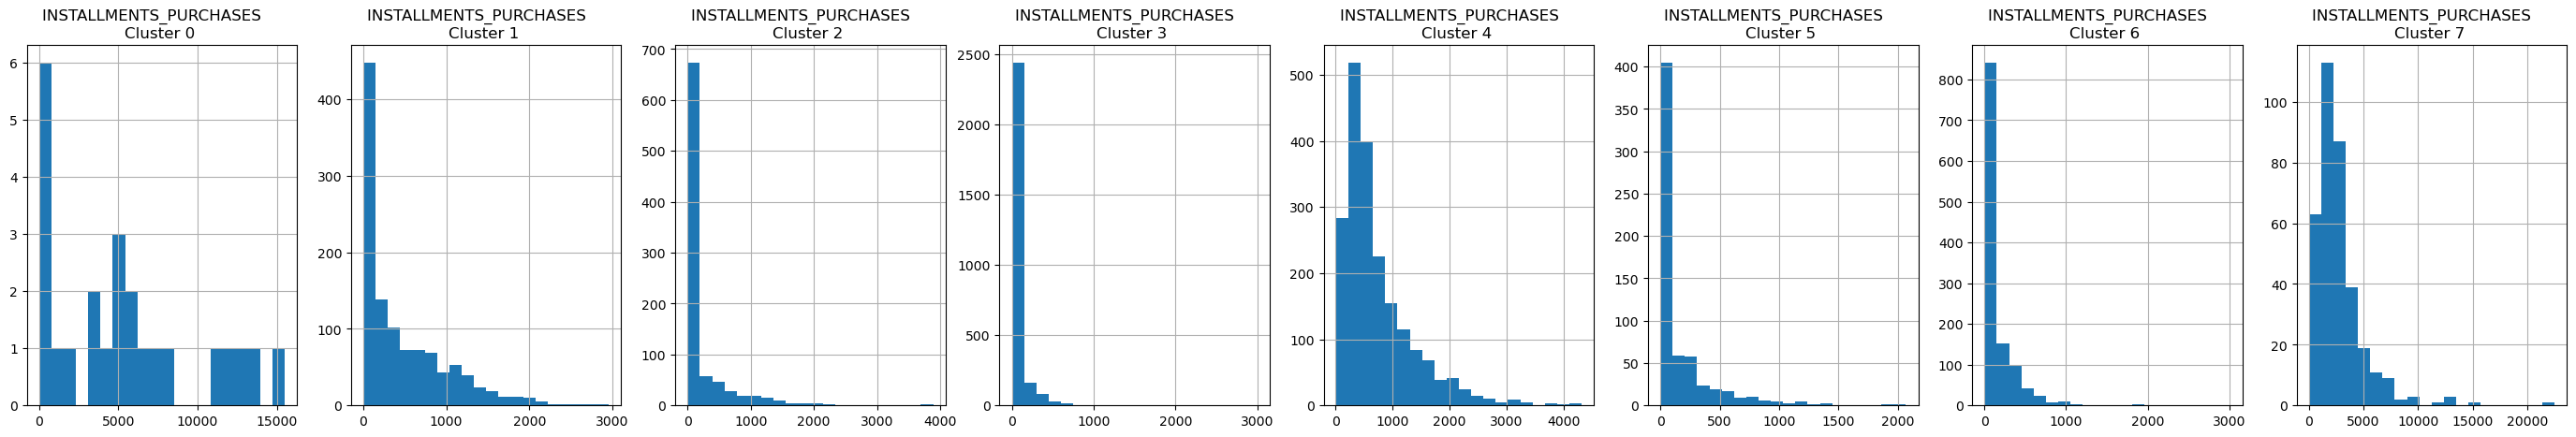

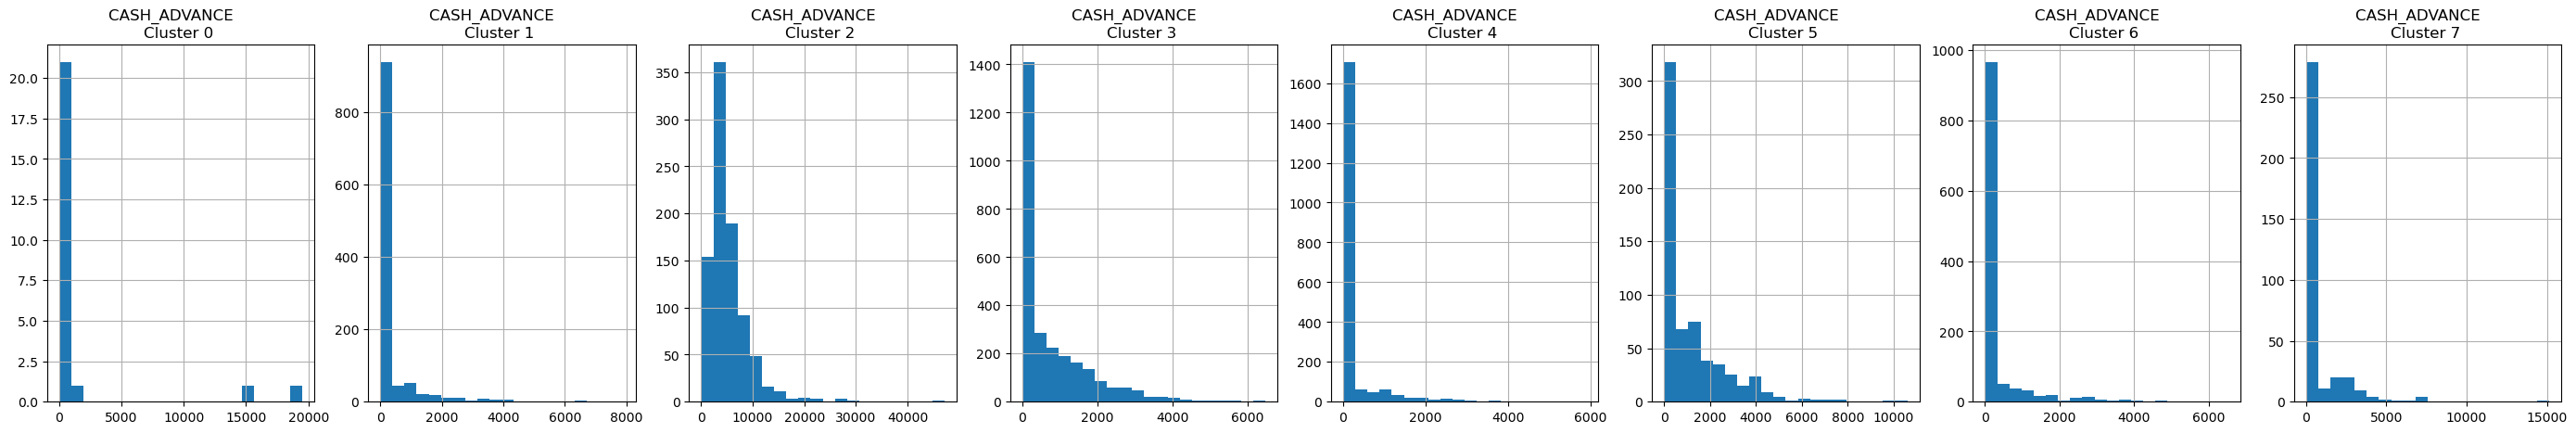

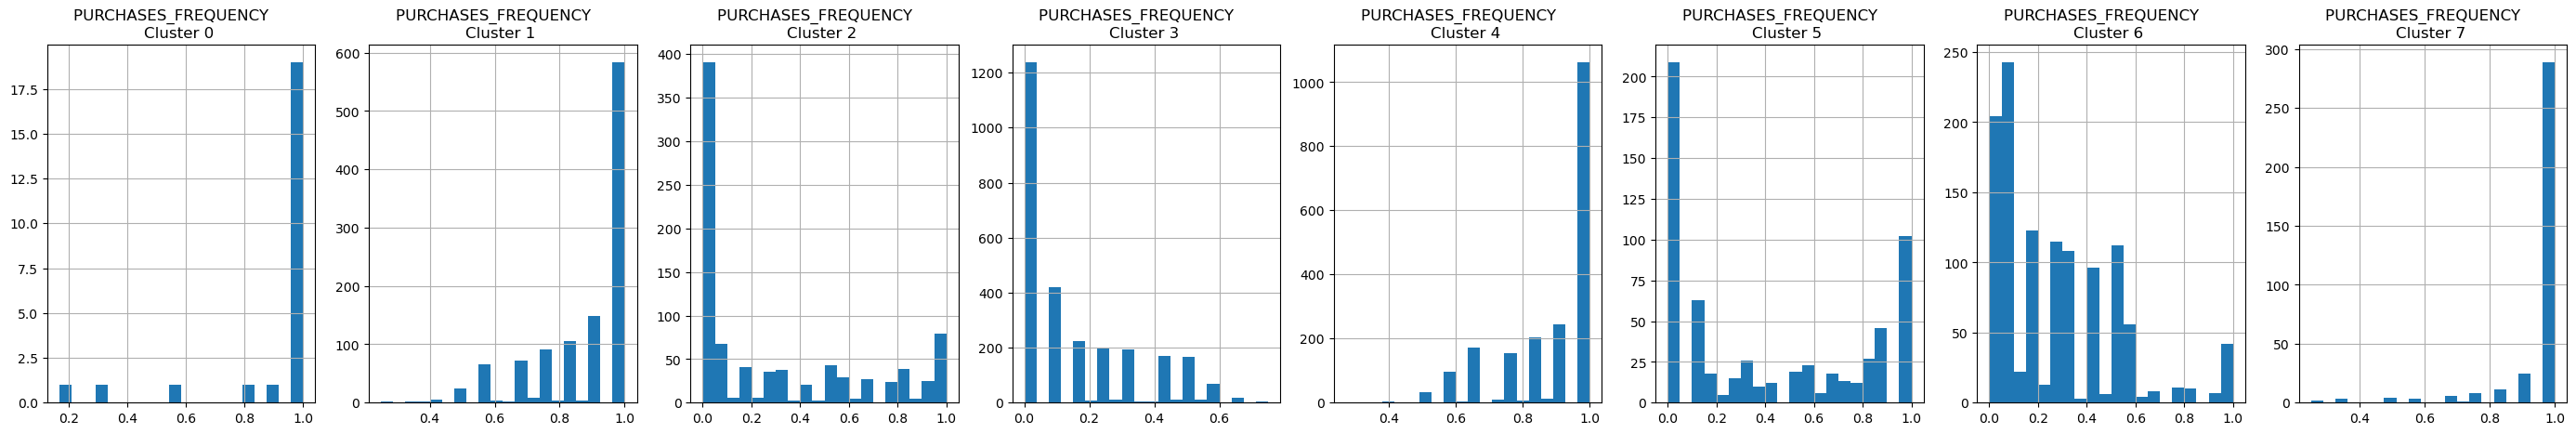

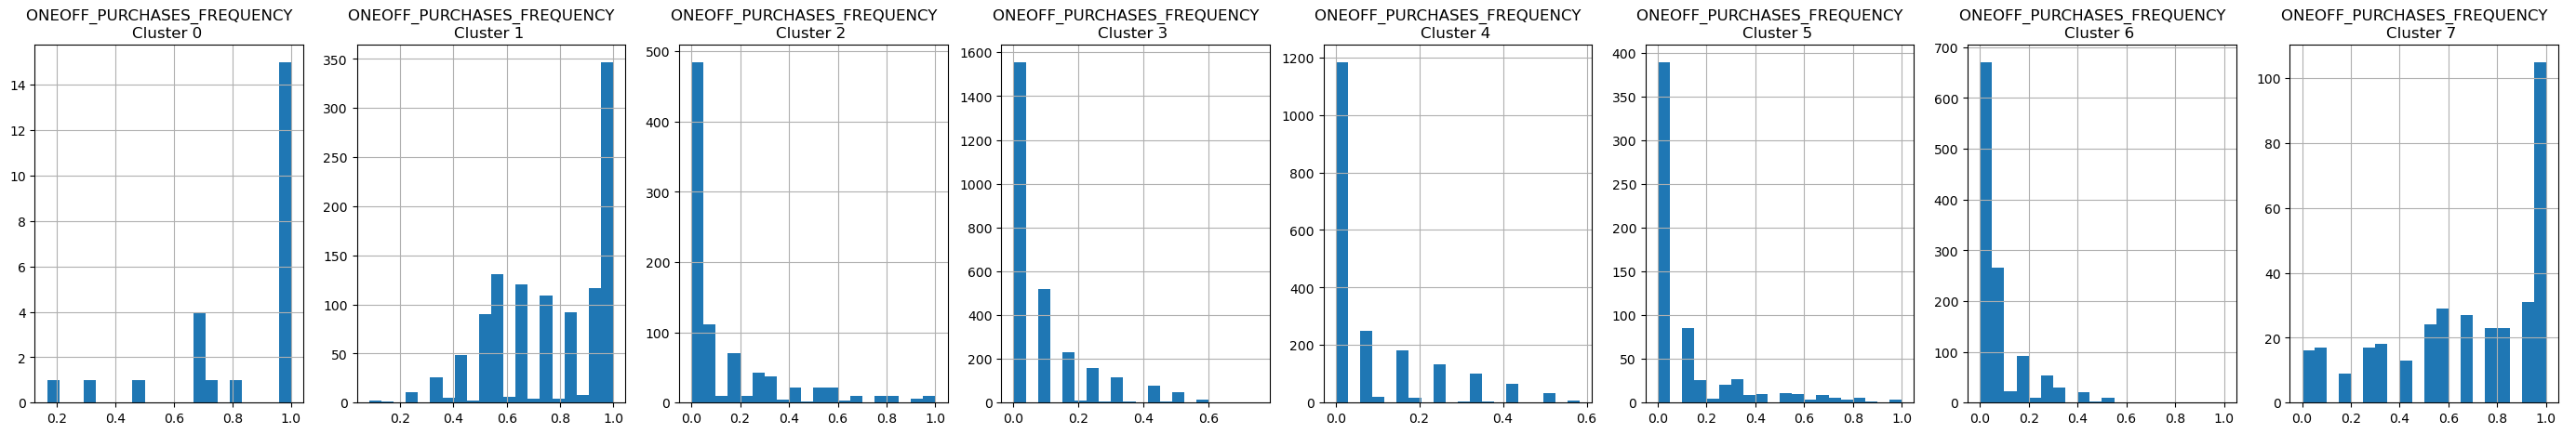

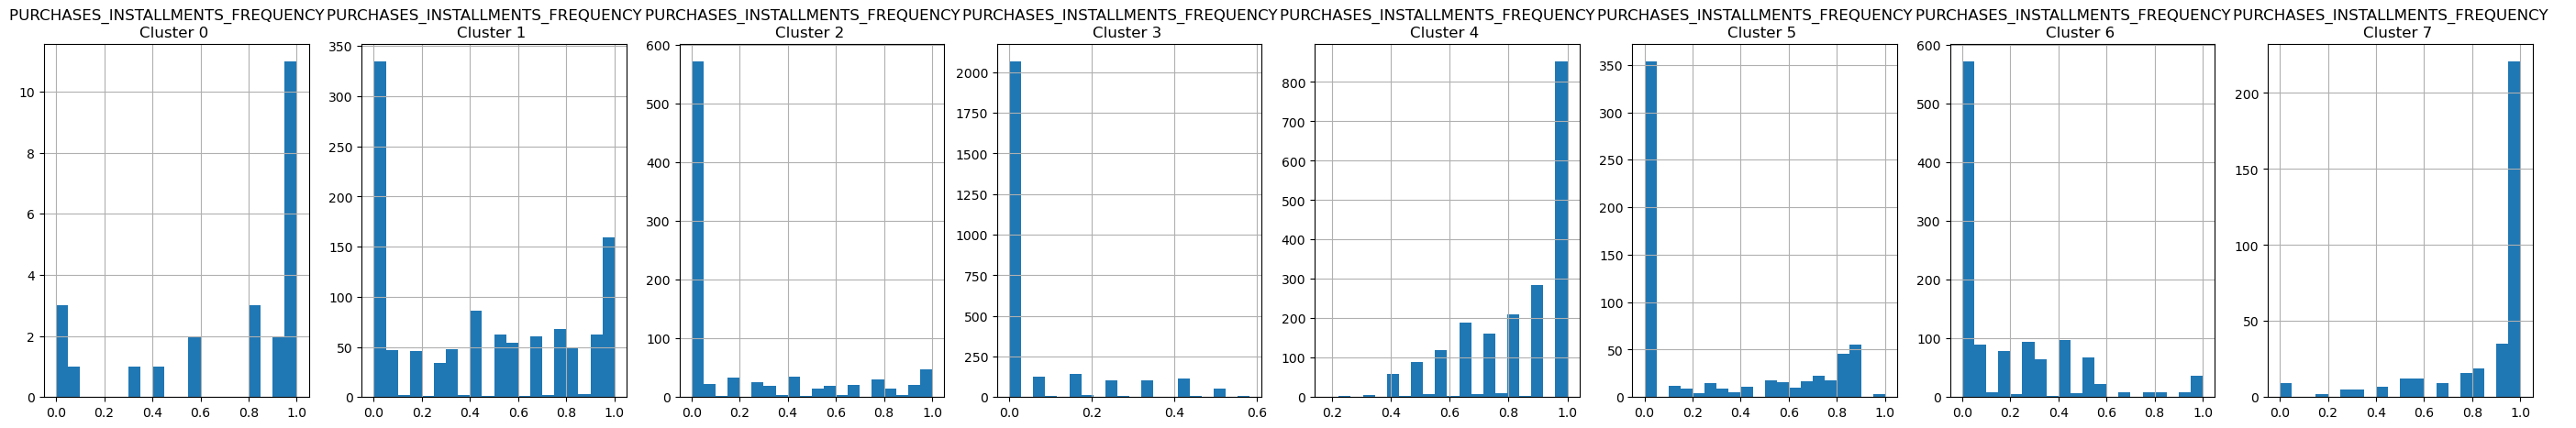

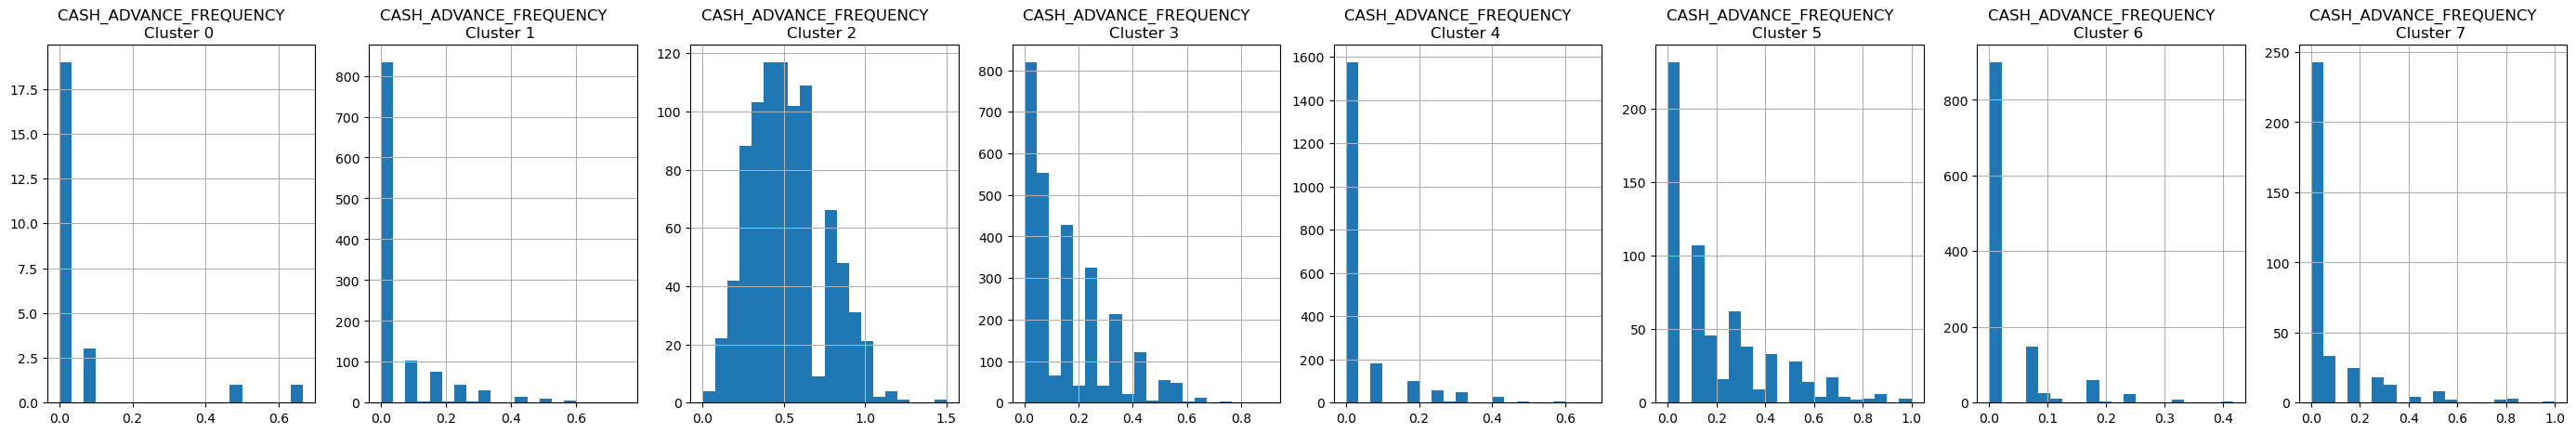

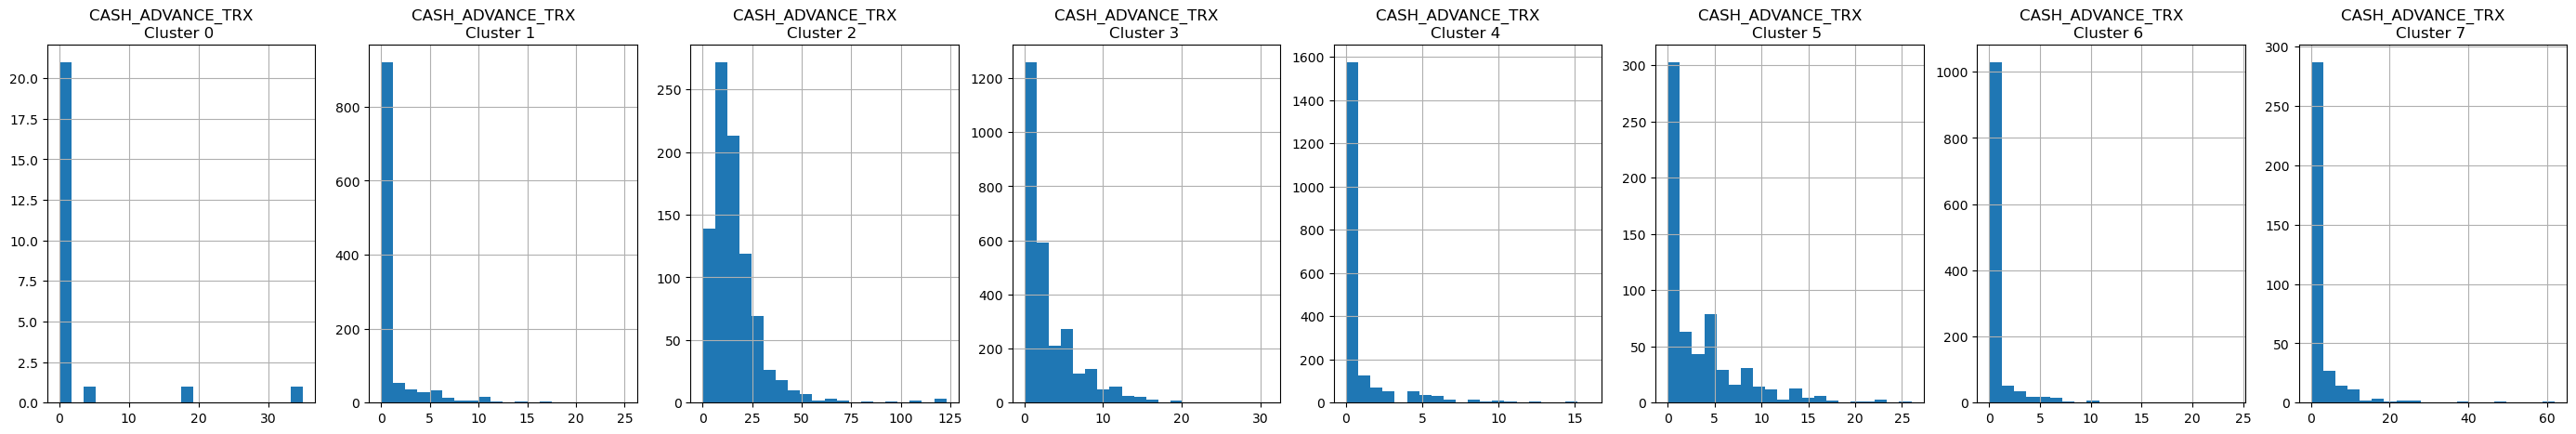

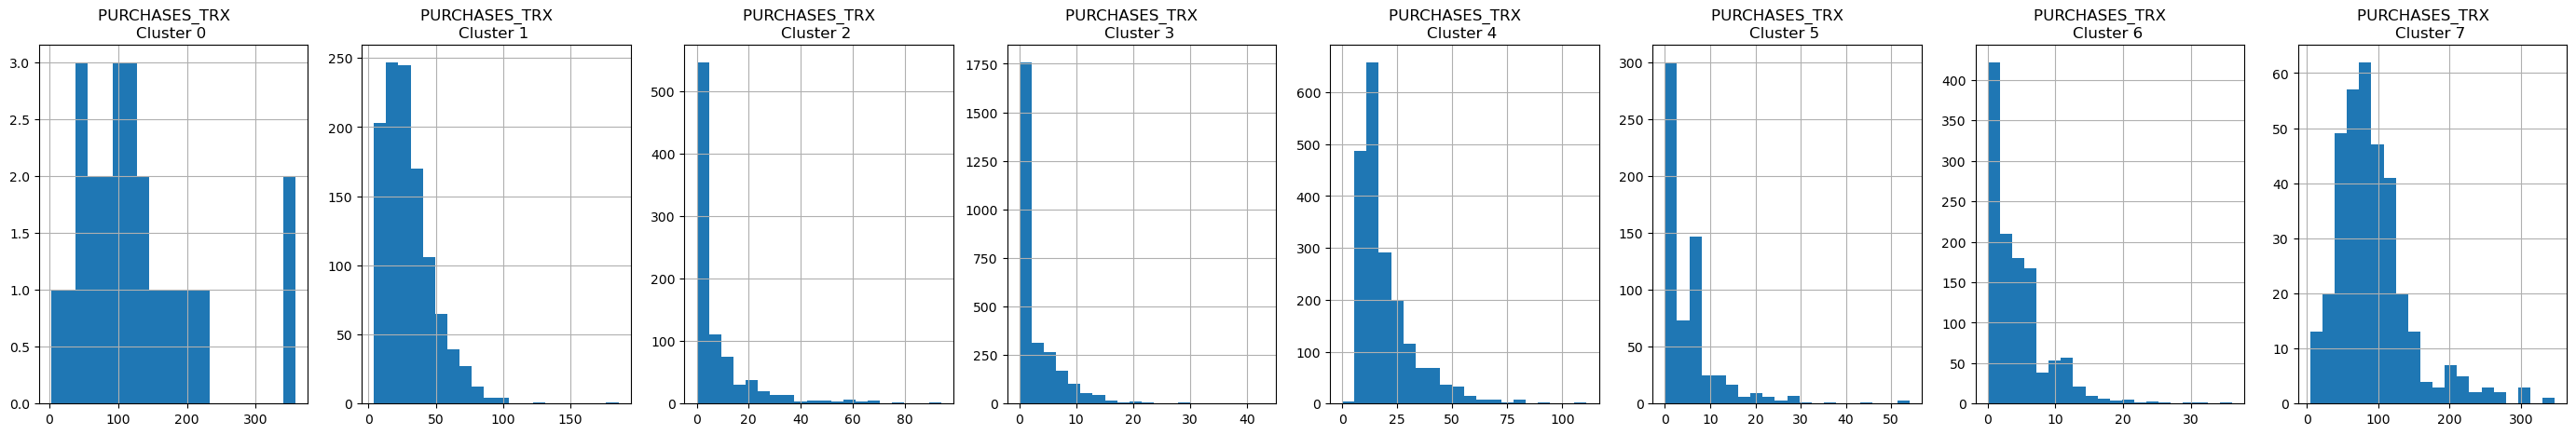

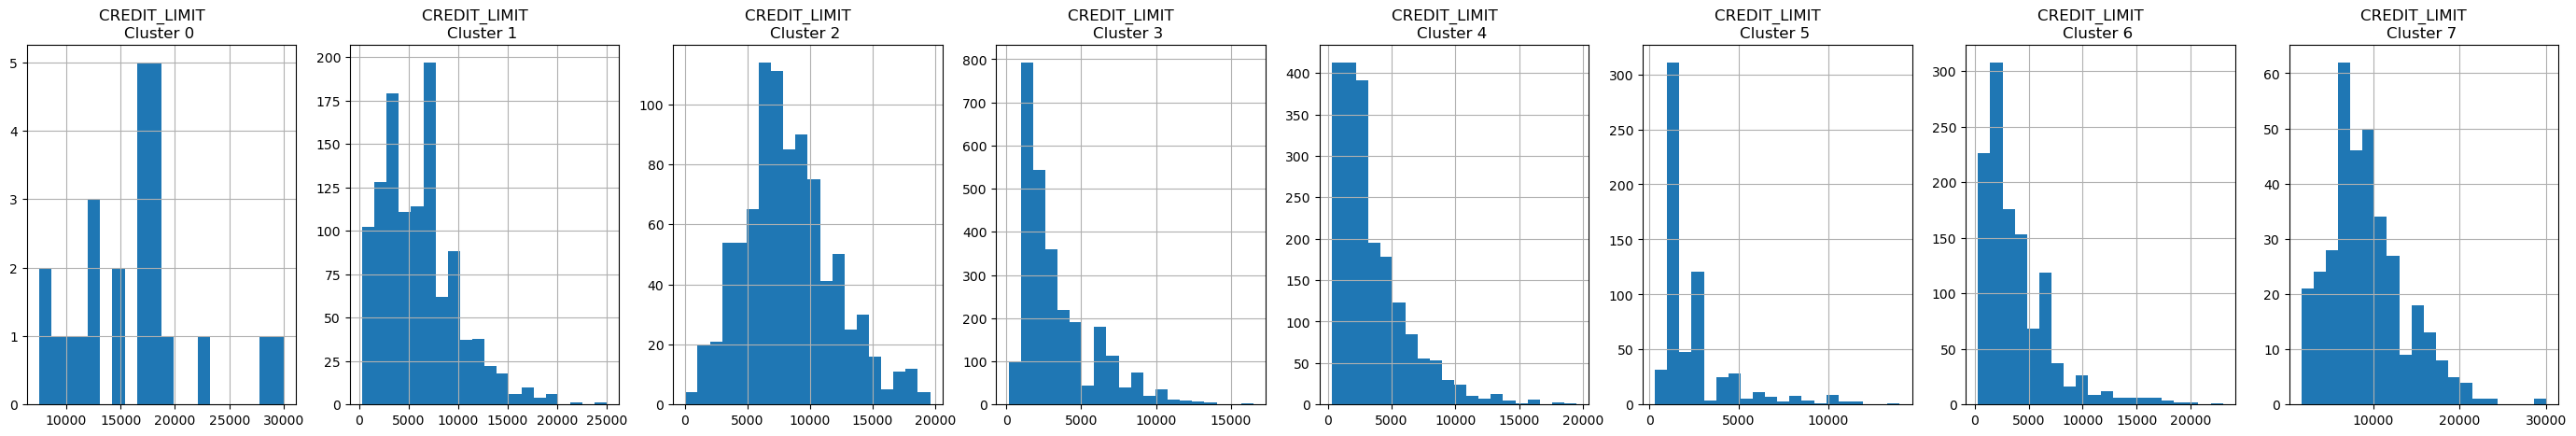

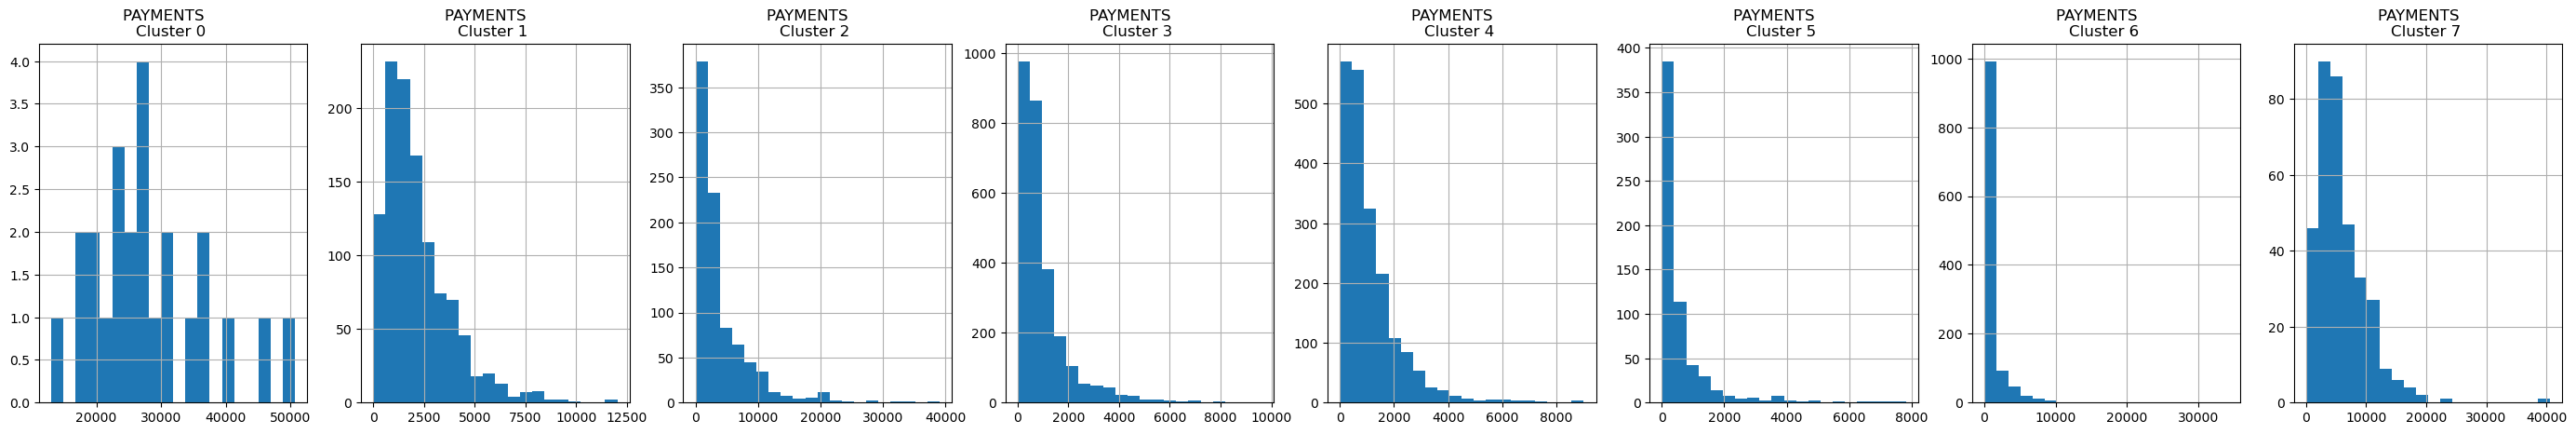

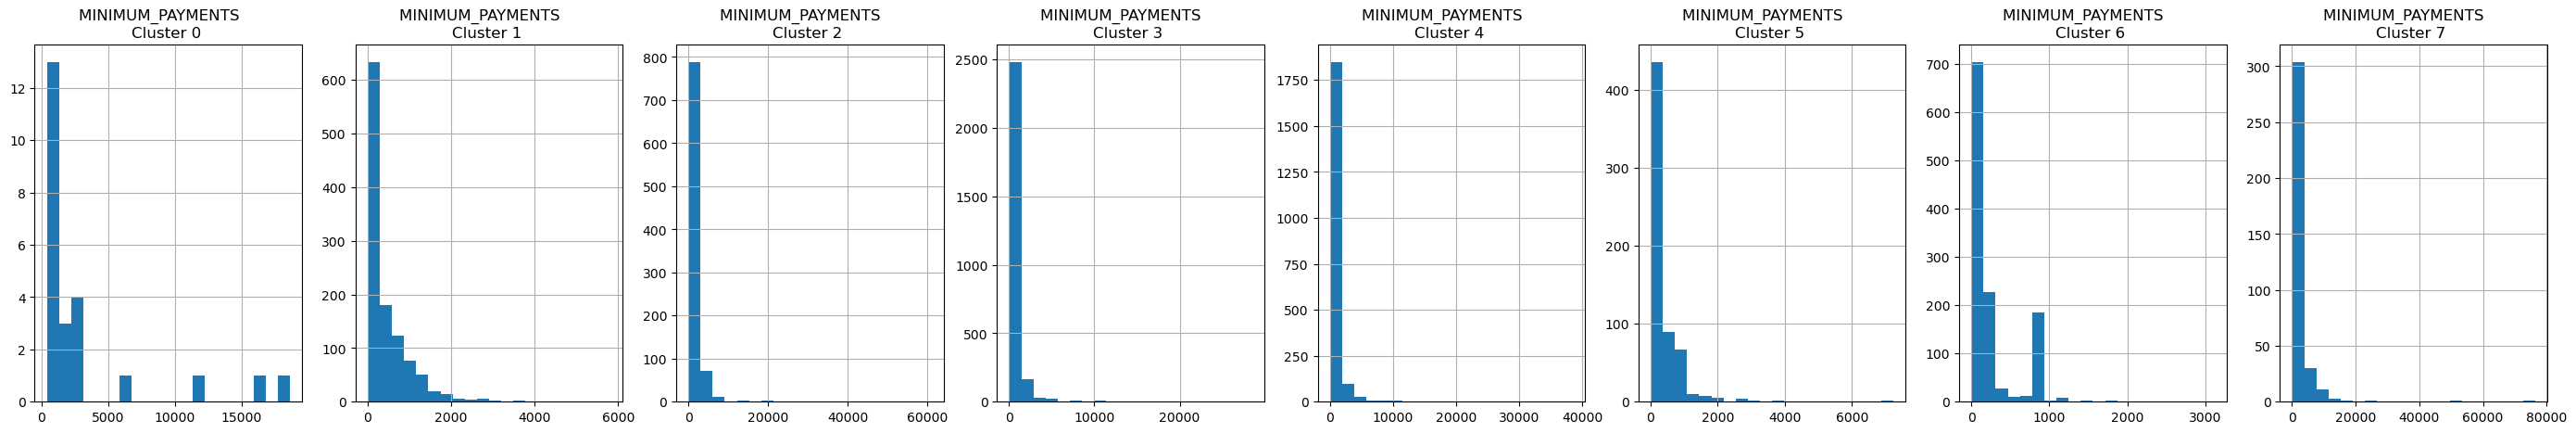

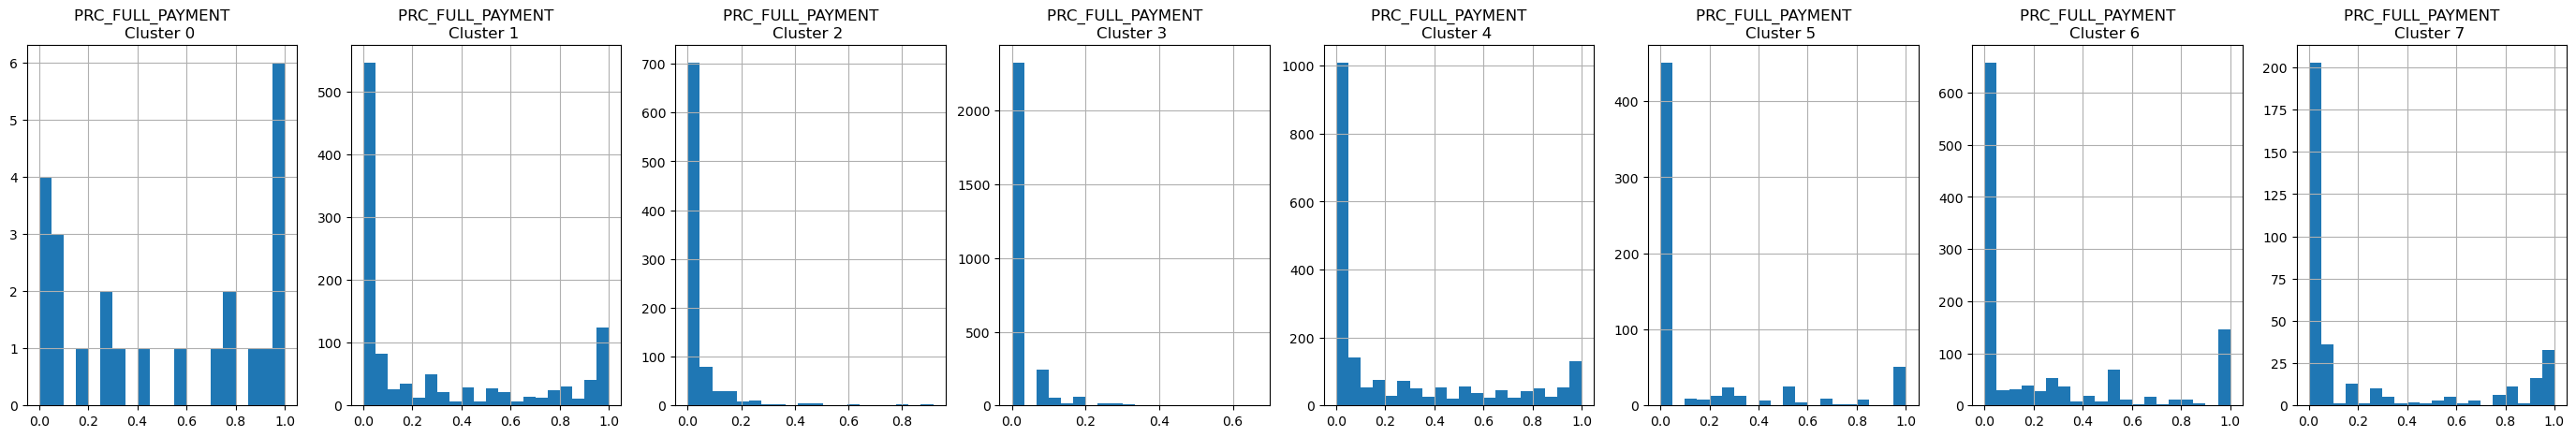

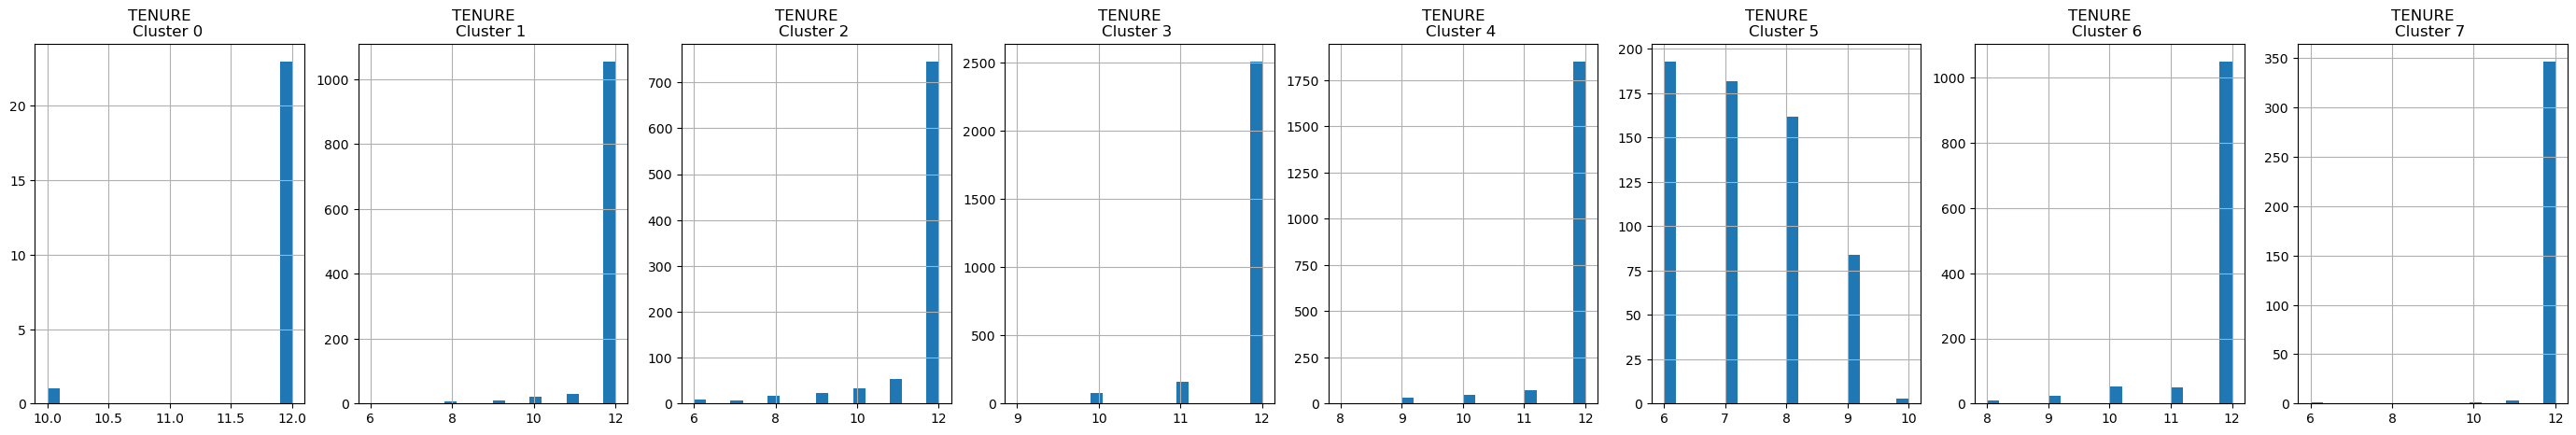

In [38]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



In [39]:
#apply PCA 

# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222033, -1.07645307],
       [-1.13829296,  2.50646178],
       [ 0.96968554, -0.38352211],
       ...,
       [-0.9262045 , -1.8107817 ],
       [-2.3365536 , -0.65795864],
       [-0.55642259, -0.40046046]])

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138293,2.506462
2,0.969686,-0.383522
3,-0.873628,0.043159
4,-1.599434,-0.688580


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,3
1,-1.138293,2.506462,2
2,0.969686,-0.383522,1
3,-0.873628,0.043159,3
4,-1.599434,-0.688580,3


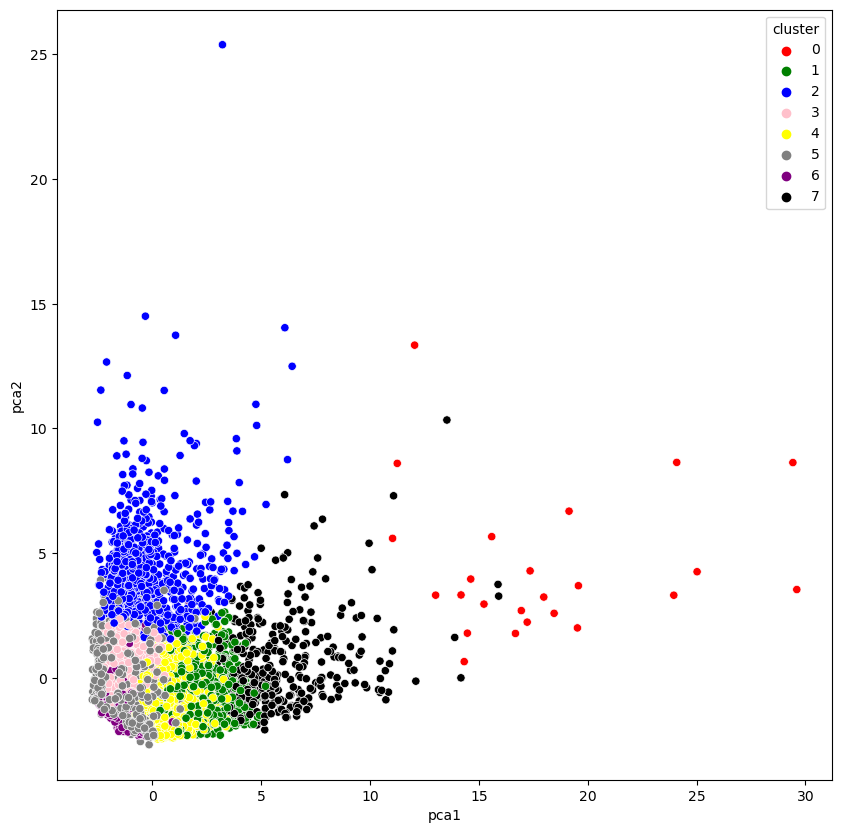

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [44]:
creditcard_df_scaled.shape

(8950, 17)

In [45]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7838
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4146
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3251
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2269
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2051
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1678
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1506
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1356
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1346
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1229
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1097
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1056
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1017
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0901
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0880
Epoc

In [46]:
autoencoder.save('autoencoder.keras')


In [47]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


In [48]:
pred.shape

(8950, 10)

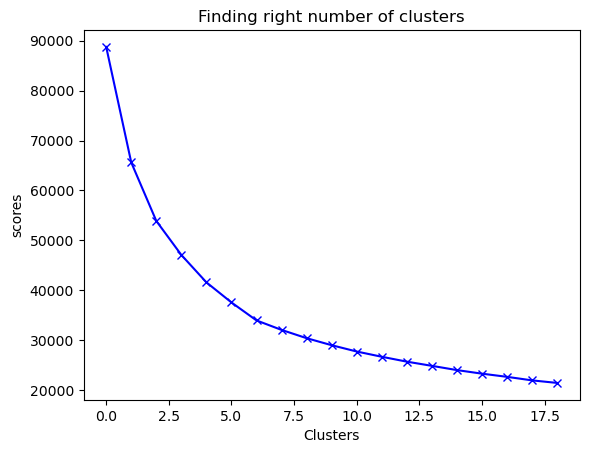

In [49]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i, n_init = 10)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

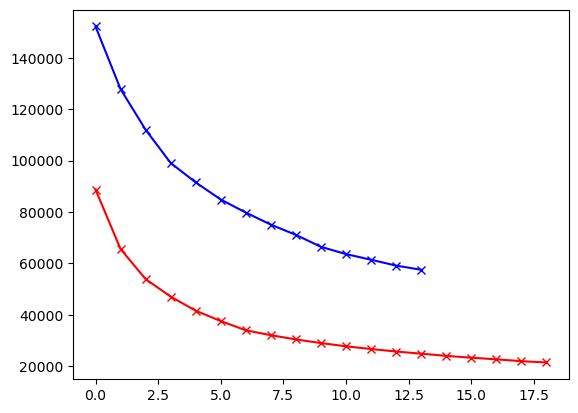

In [50]:
plt.plot(scores_1, 'bx-')
plt.plot(scores_2, 'rx-')


In [51]:
kmeans = KMeans(4, n_init = 10)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [52]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [53]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.126024,-0.192941
1,-0.161885,1.058193
2,-1.575444,-1.008576
3,-1.798628,0.110562
4,-2.218931,-0.248203


In [54]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.126024,-0.192941,0
1,-0.161885,1.058193,0
2,-1.575444,-1.008576,0
3,-1.798628,0.110562,0
4,-2.218931,-0.248203,0


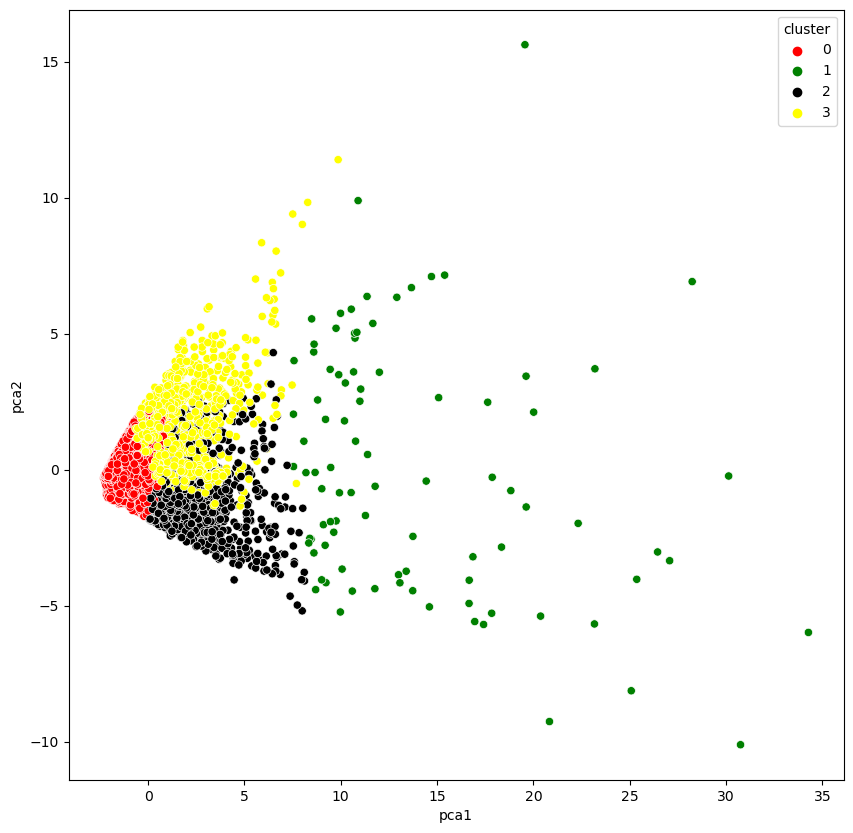

In [55]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','black','yellow'])
plt.show()